# An algorithm with only one weight offset

second is fixed

third is not exists in this task, because it's more simple for education example

[1.6000000000000003, -1]


<Axes: >

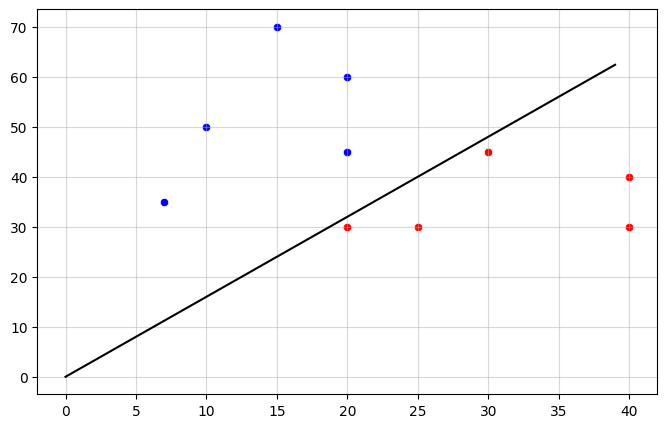

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1]) # {-1, +1}

w = [0, -1]
a = lambda x: np.sign(x[0] * w[0] + x[1] * w[1]) # @ it's x[0] * w[0] + x[1] * w[1], it's the scalar product
N = 50 # max number of iteration (learning)
L = 0.1 # value for weight changing
# to shift from the last value
last_index = -1 
e = 0.1 # a little addition for the little distance between last (border) object

for n in range(N):
    q_count = 0
    for i in range(len(x_train)):
        x_i = x_train[i]
        y_i = y_train[i]
        if a(x_i) * y_i < 0:
            last_index = i
            q_count += 1
            w[0] = w[0] + L * y_i
    if q_count == 0:
        break

if last_index != -1:
    w[0] += e * y_train[last_index]
print(w)

# in this case w2 is fixed, = -1, -> w1 * x1 + w2 * x2 = 0 -> x2 = -w1*x1/w2 = w1*x1
# x1 - first coordinate, x2 - second (y)

X = list(range(max(x_train[:, 0]))) # max from the 0-index value in the x_train
Y = [w[0] * x for x in X]

x_c1 = x_train[y_train == 1]
x_c2 = x_train[y_train == -1]

plt.figure(figsize=(8, 5))
sns.lineplot(x=X, y=Y, c='black')
plt.grid(True, alpha=0.5)
sns.scatterplot(x=x_c1[:, 0], y=x_c1[:, 1], c='red')
sns.scatterplot(x=x_c2[:, 0], y=x_c2[:, 1], c='blue')


In [13]:
import numpy as np

w = np.array([15/7, -9/7, -1])
x_test = np.array([[1, -8, -4], [1, -2, 2], [1, 4, 8], [1, 6, 3]]) # задайте самостоятельно (признаки образов: x0, x1, x2)
y_test = np.array([1, 1, -1, -1]) # задайте самостоятельно (метки класса)

# здесь продолжайте программу
a = lambda X: w.T @ X
margin = [a(x_test[0]) * y_test[0], a(x_test[1]) * y_test[1], a(x_test[2]) * y_test[2], a(x_test[3]) * y_test[3]]
print(margin)

[16.42857142857143, 2.7142857142857144, 11.0, 8.571428571428573]


<img src=".././photo/condition1.png" alt="photo" width="700" height="500">

In [14]:
import numpy as np

w = np.array([-16/9, -4/9, 1]) # задайте самостоятельно (параметры модели: w0, w1, w2 - ориентация разделяющей линии)
x_test = np.array([[1, -5, 2], [1, -4, 6], [1, 3, 2], [1, 3, -3], [1, 5, 6], [1, 9, 2]]) # задайте самостоятельно (признаки образов: x0, x1, x2)
y_test = np.array([1, 1, 1, -1, -1, -1]) # задайте самостоятельно (метки класса)
a = lambda x: x[0] * w[0] + x[1] * w[1] + x[2] * w[2]

# M_i = a(x_i) * y_i
margin = [a(x_test[0]) * y_test[0], a(x_test[1]) * y_test[1], a(x_test[2]) * y_test[2], a(x_test[3]) * y_test[3], a(x_test[4]) * y_test[4], a(x_test[5]) * y_test[5]]
print(margin)

[2.4444444444444446, 6.0, -1.1111111111111107, 6.111111111111111, -2.0, 3.7777777777777777]


<img src=".././photo/condition2.png" alt="photo" width="900" height="500">

In [15]:
import numpy as np

x_test = np.array([(-5, 2), (-4, 6), (3, 2), (3, -3), (5, 5), (5, 2), (-1, 3)])
y_test = np.array([1, 1, 1, -1, -1, -1, -1])
w = np.array([-8/3, -2/3, 1])

Q = 0
X = np.array([[1, x[0], x[1]] for x in x_test])
for i in range(len(x_test)):
    M = y_test[i] * (w @ X[i])
    if M < 0:
        Q += 1
print(Q)

2


# The other solution of the first task with the loss function

<img src=".././photo/exp.png" alt="photo" width="700" height="500">

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x_t = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_t = [x + [1] for x in x_t]
x_train = np.array(x_t)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1]) # {-1, +1}

sum1 = np.sum([x * y for x, y in zip(x_train, y_train)], axis=0) # axis = 0 for normal matrix sum
sum2 = np.sum([np.outer(x, x) for x in x_train], axis=0) # outer, not dot, because we need the column-x multiply string-x --> result is a matrix
w = np.dot(sum1, np.linalg.inv(sum2))
print(w)



[ 0.05793234 -0.0346272   0.1912188 ]
(10, 3)
(3,)
(3, 3)
(3,)


<Axes: >

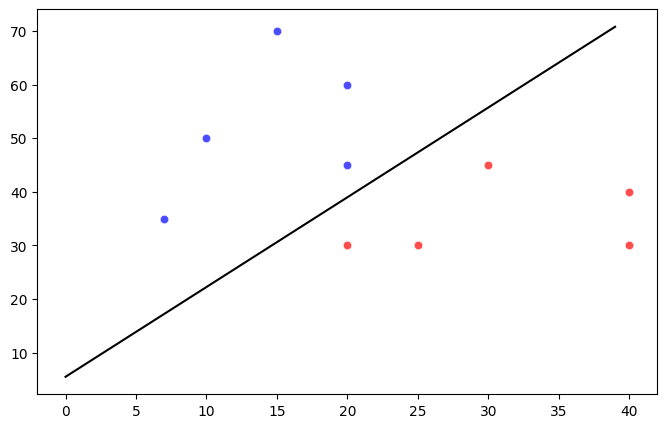

In [21]:
line_x = list(range(max(x_train[:, 0])))
line_y = [-w[0]/w[1] * x - w[2]/w[1] for x in line_x]

# points for 2 classes
x_0 = x_train[y_train == 1]
x_1 = x_train[y_train == -1]

plt.figure(figsize=(8,5))
sns.scatterplot(x=x_0[:, 0], y=x_0[:, 1], color = 'red', alpha=0.7)
sns.scatterplot(x=x_1[:, 0], y=x_1[:, 1], c='blue', alpha=0.7)
sns.lineplot(x=line_x, y=line_y, c='black')


# Counting of the average emperical risk

In [32]:
import numpy as np

def func(x):
    return 0.1 * x**2 - np.sin(x) + 0.1 * np.cos(x * 5) + 1.

coord_x = np.arange(-5.0, 5.0, 0.1) # значения отсчетов по оси абсцисс
coord_y = np.array(func(coord_x)) # значения функции по оси ординат

sz = len(coord_x) # общее число отсчетов

# здесь продолжайте программу
w = [1.11, -0.26, 0.061, 0.0226, 0.00178]
x_train = np.array([[1, x, x**2, x**3, x**4] for x in coord_x])
a = lambda x: np.dot(w, x)

Q = 0
for i, x in enumerate(x_train):
    Q += (a(x) - coord_y[i]) ** 2
Q = Q/sz
print(Q)

0.17749243683224197


In [33]:
import numpy as np

def func(x):
    return 0.5 * x**2 - 0.1 * 1/np.exp(-x) + 0.5 * np.cos(2*x) - 2.

coord_x = np.arange(-5.0, 5.0, 0.1) # значения отсчетов по оси абсцисс
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x) # общее число отсчетов

w = [-1.59,-0.69,0.278,0.497,-0.106]
x_train = np.array([[1, x, x**2, np.cos(2*x), np.sin(2*x)] for x in coord_x])
a = lambda x: np.dot(w, x)

Q = 0
for i, x in enumerate(x_train):
    Q += abs(a(x) - coord_y[i])
Q /= sz
print(Q)

0.9250026294525024


# Binary classification

In [2]:
import numpy as np

data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = np.array([-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1])

xt = [[1] + list(x) for x in data_x]
x_train = np.array(xt)
y_train = np.array(data_y)

exp1 = np.sum([np.dot(x ,y) for x, y in zip(x_train, y_train)], axis=0)
exp2 = np.linalg.inv(np.sum([np.outer(x, x) for x in x_train], axis=0))

w = np.dot(exp1, exp2)
print(w)

[ 0.00617453  1.95370269 -3.31307062]
